
# **Initiate and Configure Spark**

---


In [ ]:
!pip3 install pyspark

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 316.9/316.9 MB 3.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pyspark: filename=pyspark-3.5.0-py2.py3-none-any.whl size=317425345 sha256=d61ccc286005e8d0fce46474178551b54a71a305b184a4bc0e7921537ba1be46
  Stored in directory: /root/.cache/pip/wheels/41/4e/10/c2cf2467f71c678cfc8a6b9ac9241e5e44a01940da8fbb17fc
Successfully built pyspark


In [ ]:
# linking with Spark
from pyspark.sql import SparkSession
from pyspark import SparkContext, SparkConf



# Initialize Spark using conf
conf = SparkConf()
conf.set("spark.app.name", "RDDExample")
conf.set("spark.master", "local[*]")
sc = SparkContext.getOrCreate()

spark = SparkSession \
 .builder \
 .appName("Python Spark CRWK") \
 .config("spark.some.config.option", "some-value") \
 .getOrCreate()




# **Load Unstructured Data and Convert it to Spark DF **

---


In [ ]:
# Load the unstructrued data: (1) drag and drop data here or (2) use Google Drive
log_rdd = sc.textFile('/content/web.log',8)

df = spark.read.text('/content/web.log')


In [ ]:
# Convert the unstructrued data to Spark DF
from pyspark.sql.functions import regexp_extract
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

print(df.columns[0])
df = df.select(
    regexp_extract(df.columns[0], r'([^ ]*) - - \[(\d{2}/[A-Za-z]{3}/\d{4}:\d{2}:\d{2}:\d{2})\] "([^\ ]*) ([^\ ]*) ([^\"]*)" (\d*) (\d*) ([^"]*)', 1).alias("Host making the request"),
    regexp_extract(df.columns[0], r'([^ ]*) - - \[(\d{2}/[A-Za-z]{3}/\d{4}:\d{2}:\d{2}:\d{2})\] "([^\ ]*) ([^\ ]*) ([^\"]*)" (\d*) (\d*) ([^"]*)', 2).alias("Timestamp"),
    regexp_extract(df.columns[0], r'([^ ]*) - - \[(\d{2}/[A-Za-z]{3}/\d{4}:\d{2}:\d{2}:\d{2})\] "([^\ ]*) ([^\ ]*) ([^\"]*)" (\d*) (\d*) ([^"]*)', 3).alias("HTTP method"),
    regexp_extract(df.columns[0], r'([^ ]*) - - \[(\d{2}/[A-Za-z]{3}/\d{4}:\d{2}:\d{2}:\d{2})\] "([^\ ]*) ([^\ ]*) ([^\"]*)" (\d*) (\d*) ([^"]*)', 4).alias("URL"),
    regexp_extract(df.columns[0], r'([^ ]*) - - \[(\d{2}/[A-Za-z]{3}/\d{4}:\d{2}:\d{2}:\d{2})\] "([^\ ]*) ([^\ ]*) ([^\"]*)" (\d*) (\d*) ([^"]*)', 5).alias("HTTP Version"),
    regexp_extract(df.columns[0], r'([^ ]*) - - \[(\d{2}/[A-Za-z]{3}/\d{4}:\d{2}:\d{2}:\d{2})\] "([^\ ]*) ([^\ ]*) ([^\"]*)" (\d*) (\d*) ([^"]*)', 6).alias("HTTP status code"),
    regexp_extract(df.columns[0], r'([^ ]*) - - \[(\d{2}/[A-Za-z]{3}/\d{4}:\d{2}:\d{2}:\d{2})\] "([^\ ]*) ([^\ ]*) ([^\"]*)" (\d*) (\d*) ([^"]*)', 7).alias("Bytes in the reply"),
    regexp_extract(df.columns[0], r'([^ ]*) - - \[(\d{2}/[A-Za-z]{3}/\d{4}:\d{2}:\d{2}:\d{2})\] "([^\ ]*) ([^\ ]*) ([^\"]*)" (\d*) (\d*) ([^"]*)', 8).alias("Message"),
)

df.show()



value
+-----------------------+--------------------+-----------+--------------------+------------+----------------+------------------+--------------------+
|Host making the request|           Timestamp|HTTP method|                 URL|HTTP Version|HTTP status code|Bytes in the reply|             Message|
+-----------------------+--------------------+-----------+--------------------+------------+----------------+------------------+--------------------+
|         88.211.105.115|04/Mar/2022:14:17:48|       POST|  /history/missions/|    HTTP/2.0|             414|             12456|Caution: System m...|
|           144.6.49.142|02/Sep/2022:15:16:00|       POST| /security/firewall/|   HTTPS/1.0|             203|             97126|Warning: Unusual ...|
|          231.70.64.145|19/Jul/2022:01:31:31|        PUT|/web-development/...|    HTTP/1.0|             201|             33093|Informational mes...|
|         219.42.234.172|08/Feb/2022:11:34:57|       POST|/networking/techn...|    HTTP/1.0|  


# **Task 1: Spark SQL [30 marks]**

---



+-------+------------+
|  month|NumberOfURLs|
+-------+------------+
|2022-01|          47|
|2022-02|          54|
|2022-03|          51|
|2022-04|          38|
|2022-05|          37|
|2022-06|          45|
|2022-07|          52|
|2022-08|          54|
|2022-09|          44|
|2022-10|          50|
|2022-11|          49|
|2022-12|          54|
|2023-01|          48|
|2023-02|          46|
|2023-03|          47|
|2023-04|          43|
|2023-05|          49|
|2023-06|          43|
|2023-07|          48|
|2023-08|          41|
+-------+------------+
only showing top 20 rows



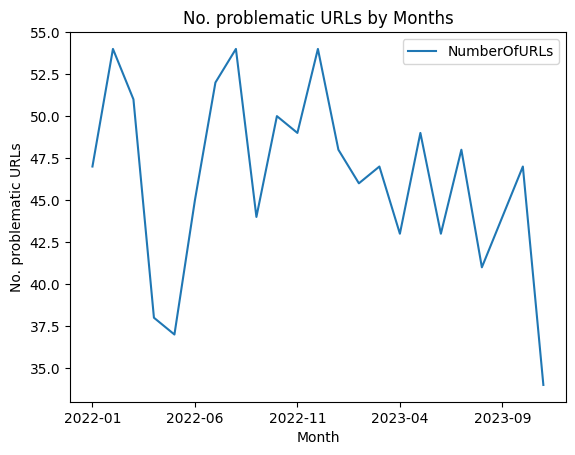

In [ ]:
# Query 1 [Briefly explain with output]:
# The most inner query takes year, month pairs as month and gives the table showing total monthly request returning service error received by each distinct URL.
# Then using this table , we achieve average failed request number for a url for each month and append it as a column to the table.
# Finally , we compare this average failed request number with the actual request number of the urls to find out if this URL exceeded the average in this month.
# We count such URLs for each month. We can observe performance of each month in terms of the number of really problematic urls
# giving more than average error even though the request is made properly


df.createOrReplaceTempView("NewView")
sqlDF = spark.sql("SELECT month,COUNT(DISTINCT URL) as NumberOfURLs FROM (SELECT URL,month,requests,ROUND(AVG(requests) OVER(PARTITION BY month)) AS average_request FROM (SELECT URL,DATE_FORMAT(TO_TIMESTAMP(Timestamp, 'dd/MMM/yyyy:HH:mm:ss'), 'yyyy-MM') as month,COUNT(DISTINCT `Host making the request`) as requests  FROM NewView WHERE CAST(`HTTP status code` AS INTEGER) BETWEEN 500 AND 599 GROUP BY month,URL )) as temp WHERE temp.requests > temp.average_request GROUP BY month ORDER BY month")
sqlDF.show()


pandas_df = sqlDF.toPandas()
pandas_df.plot(x='month', y='NumberOfURLs', kind = 'line')
plt.xlabel('Month')
plt.ylabel('No. problematic URLs')
plt.title('No. problematic URLs by Months')
plt.show()



+--------------------+--------+-----------+
|                 URL|requests|       code|
+--------------------+--------+-----------+
|/cloud-computing/...|     719|      ERROR|
|/cloud-computing/...|     410|REDIRECTION|
|/cloud-computing/...|     795| SUCCESSFUL|
|/images/deep-lear...|     630|      ERROR|
|/images/deep-lear...|     409|REDIRECTION|
|/images/deep-lear...|     780| SUCCESSFUL|
| /images/technology/|     690|      ERROR|
| /images/technology/|     376|REDIRECTION|
| /images/technology/|     824| SUCCESSFUL|
|/machine-learning...|     716|      ERROR|
|/machine-learning...|     406|REDIRECTION|
|/machine-learning...|     822| SUCCESSFUL|
| /networking/launch/|     678|      ERROR|
| /networking/launch/|     427|REDIRECTION|
| /networking/launch/|     824| SUCCESSFUL|
+--------------------+--------+-----------+



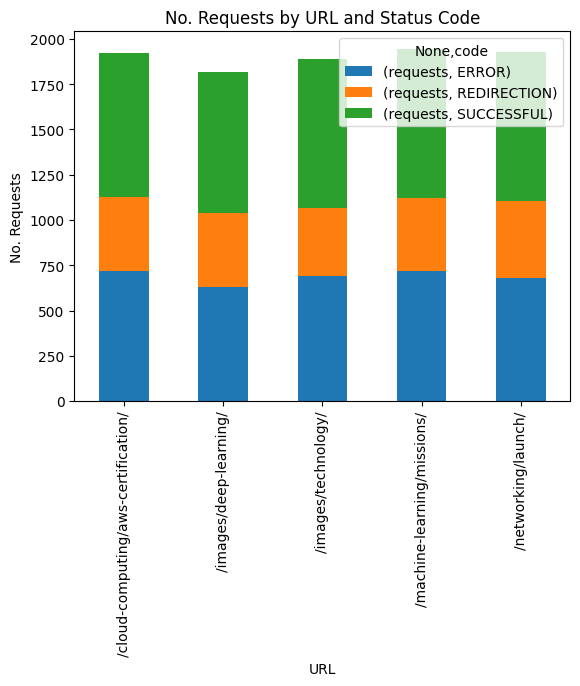

In [ ]:
# Query 2 [Briefly explain with output]:
# This query shows the request distribution according to statuses of the five urls which returned the biggest response
# The higher size in response costs more so we can use this distribution to analyse the status outcomes of these costful URLs
sqlDF = spark.sql("SELECT URL, count(distinct Timestamp,`Host making the request` ) as requests, CASE WHEN CAST(`HTTP status code` AS INTEGER) > 400 THEN 'ERROR' WHEN CAST(`HTTP status code` AS INTEGER) BETWEEN 300 AND 400 THEN 'REDIRECTION' WHEN CAST(`HTTP status code` AS INTEGER) BETWEEN 200 AND 300 THEN 'SUCCESSFUL' END AS code FROM NewView WHERE URL IN (SELECT URL FROM NewView ORDER BY `Bytes in the reply` DESC LIMIT 5) GROUP BY code,URL ORDER BY URL,code ")
sqlDF.show()

pandas_df = sqlDF.toPandas()
grouped_df = pandas_df.groupby(['URL', 'code']).sum().unstack('code')
grouped_df.plot(kind='bar', stacked=True)

plt.xlabel('URL')
plt.ylabel('No. Requests')
plt.title('No. Requests by URL and Status Code')
plt.show()




---


# **Task 2 - Spark RDD**

---


In [ ]:
import re

# analysis 1 and result using RDD operators:
# The goal is to find the most frequently occurring word in the log messages associated with each HTTP method
line_pattern = r'([^ ]*) - - \[(\d{2}/[A-Za-z]{3}/\d{4}:\d{2}:\d{2}:\d{2})\] "([^\ ]*) ([^\ ]*) ([^\"]*)" (\d*) (\d*) ([^"]*)'
word_pattern = r'\b\w{1,2}\b'
parsed_rdd = log_rdd.flatMap(lambda line: re.findall(line_pattern,line))

reduced_rdd = parsed_rdd.map(lambda line: (line[2],re.sub(word_pattern, '', line[7]).replace("  ", "").split(" "))).reduceByKey(lambda x, y: x + y)
result_rdd = reduced_rdd.flatMap(lambda pair: [((pair[0], item),1) for item in pair[1]]).reduceByKey(lambda x, y: x + y).groupBy(lambda x:x[0][0]).map(lambda keyVal: max(keyVal[1], key=lambda item: item[1]))
result_rdd.collect()


[(('PUT', 'detected.'), 39903),
 (('GET', 'System'), 40037),
 (('POST', 'information.'), 40282)]

In [ ]:
# analysis 2 and result using RDD operators:
# The goal is calculate the average 'bytes in the reply' for each url-code pair and takes highest 5

# group the data by (url,code)
grouped_rdd = parsed_rdd.map(lambda line: (line[3],line[5],line[6])).groupBy(lambda x:(x[0],x[1]))
# calculate total bytes for each pair
calculated_rdd = grouped_rdd.map(lambda keyVal: (( keyVal[0] + (len(keyVal[1]),) ), keyVal[1])).flatMap(lambda pair: [(pair[0], item[2]) for item in pair[1]]).reduceByKey(lambda x, y: int(x) + int(y))
print('Calculated total bytes for each pair looks like:',calculated_rdd.take(2),'\n')

# find average bytes for each pair and take 5 of them
averaged_rdd = calculated_rdd.map(lambda keyVal: (keyVal[0][0],keyVal[0][1],  round(keyVal[1] / keyVal[0][2]) )).takeOrdered(5, key = lambda x: -x[2])
averaged_rdd



Calculated total bytes for each pair looks like: [(('/images/frontend-frameworks-comparison/', '205', 315), 15834948), (('/networking/firewall/', '304', 307), 15162530)] 



[('/images/launch/', '204', 56395),
 ('/security/data/', '204', 55903),
 ('/data-analysis/firewall/', '203', 55761),
 ('/images/deep-learning/', '416', 55036),
 ('/software/data/', '416', 54803)]

In [ ]:
# analysis 3 and result using RDD operators:
# The goal is to identify and display high-traffic URL and HTTP code combinations.

# Map the parsed RDD to a new structure (url, rounded_http_code, 1)
grouped_rdd = parsed_rdd.map(lambda line: (line[3],str(round(int(line[5]), -2)).replace("00", ".."),1)).groupBy(lambda x: (x[0],x[1]))
# Group the RDD by a composite key (url, rounded_http_code)
arranged_rdd = grouped_rdd.mapValues(lambda values: len(values))
#Calculate the threshold as the average count of requests for each unique URL and HTTP code category
threshold =  arranged_rdd.map(lambda x: x[1]).reduce(lambda x, y: x + y) /  arranged_rdd.count()
print('Threshold',threshold)
filtered_rdd = arranged_rdd.filter(lambda entry: entry[1] > threshold).sortBy(lambda x: x[1])
print('\nTop 10 Entries:')
for entry in filtered_rdd.take(10):
    print(f'{entry[0]}: {entry[1]} requests')



Threshold 1123.3666666666666

Top 10 Entries:
('/cloud-computing/countdown/', '4..'): 1200 requests
('/images/deep-learning/', '4..'): 1219 requests
('/machine-learning/cybersecurity/', '4..'): 1221 requests
('/images/aws-certification/', '4..'): 1222 requests
('/images/apollo/', '4..'): 1223 requests
('/history/cybersecurity/', '4..'): 1223 requests
('/software/firewall/', '4..'): 1230 requests
('/software/frontend-frameworks-comparison/', '4..'): 1231 requests
('/security/apollo/', '4..'): 1233 requests
('/machine-learning/firewall/', '4..'): 1235 requests


# **Convert ipynb to HTML **

---



In [ ]:
# install nbconvert
!pip3 install nbconvert


# convert ipynb to html
# file name: "Your_Group_ID_CN7031.ipynb
!jupyter nbconvert --to html /content/Group19_CN7031.ipynb

[NbConvertApp] Converting notebook /content/Group19_CN7031.ipynb to html
[NbConvertApp] Writing 938478 bytes to /content/Group19_CN7031.html
